In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
def load_data():
    df = pd.read_csv('creditcard.csv')
    return df

In [ ]:
# Preprocess the data
def preprocess_data(df):
    # Separate features and target variable
    X = df.drop(columns=['Class'])
    y = df['Class']

    # Normalize the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    return X_scaled, y


In [ ]:
# Train Isolation Forest model for anomaly detection
def train_anomaly_detection(X_train):
    model = IsolationForest(contamination=0.001)
    model.fit(X_train)
    return model


In [ ]:

# Train classification model
def train_classification_model(X_train, y_train):
    from sklearn.ensemble import RandomForestClassifier
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    return model


In [ ]:

# Evaluate the model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    return accuracy, cm, report

def plot_confusion_matrix(cm):
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

In [ ]:
def load_data():
    df = pd.read_csv('creditcard.csv')
    # Drop rows with missing values in the 'Class' column
    df.dropna(subset=['Class'], inplace=True)  # Add this line to handle NaNs
    return df

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

Isolation Forest Model Accuracy: 0.0023260321767784456
Isolation Forest Model Confusion Matrix:
 [[    0     0     0]
 [    7     0 10281]
 [    6     0    24]]
Isolation Forest Model Classification Report:
               precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00         0
         0.0       0.00      0.00      0.00     10288
         1.0       0.00      0.80      0.00        30

    accuracy                           0.00     10318
   macro avg       0.00      0.27      0.00     10318
weighted avg       0.00      0.00      0.00     10318

Classification Model Accuracy: 0.9995154099631711
Classification Model Confusion Matrix:
 [[10286     2]
 [    3    27]]
Classification Model Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     10288
         1.0       0.93      0.90      0.92        30

    accuracy                           1.00     10318
   macro avg       0.97    

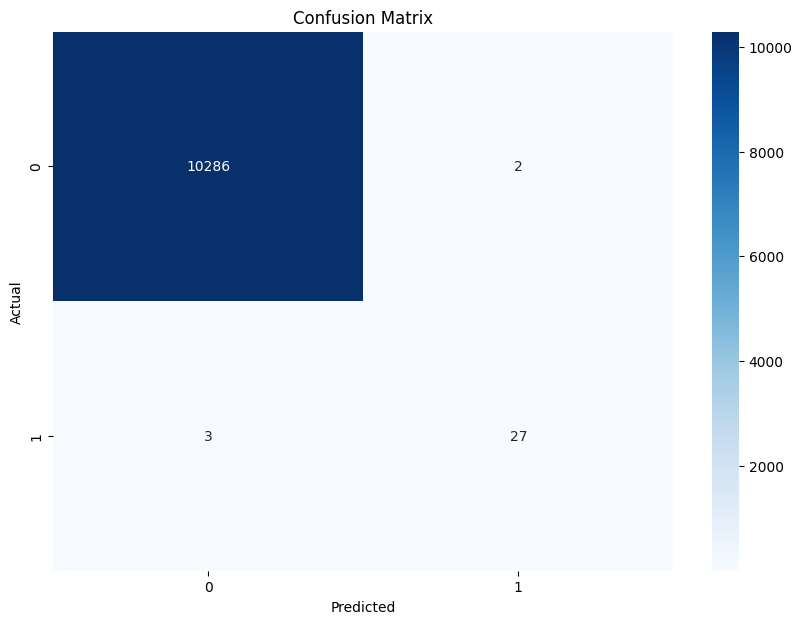

In [ ]:
def main():
    df = load_data()

    # Preprocess data
    X, y = preprocess_data(df)

    # Split data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    # Train Isolation Forest model
    isolation_model = train_anomaly_detection(X_train)

    # Train classification model
    classification_model = train_classification_model(X_train, y_train)

    # Evaluate Isolation Forest model
    isolation_accuracy, isolation_cm, isolation_report = evaluate_model(isolation_model, X_test, y_test)
    print("Isolation Forest Model Accuracy:", isolation_accuracy)
    print("Isolation Forest Model Confusion Matrix:\n", isolation_cm)
    print("Isolation Forest Model Classification Report:\n", isolation_report)

    # Evaluate classification model
    classification_accuracy, classification_cm, classification_report = evaluate_model(classification_model, X_test, y_test)
    print("Classification Model Accuracy:", classification_accuracy)
    print("Classification Model Confusion Matrix:\n", classification_cm)
    print("Classification Model Classification Report:\n", classification_report)

    # Plot confusion matrix for classification model
    plot_confusion_matrix(classification_cm)

if __name__ == "__main__":
    main()
